# SALES PREDICTION

# About:-

Sales Prediction involves forecasting the amount of the product that customers will purchase, taking into account various
factors such as advertisig expenditure,target audience segmentation, and advertising platform selection.In bussiness that 
or offer products or services ,the role ofa  Data Scientist is crucial for predecting future sales.They utilize machine 
learning techniques in Python to anlayze and interpret data ,allowing them to make informed decisions regardingadvertising 
costs.By leveraging these predictions,bussiness can optimize their advertising strategies and maximize sales potential. 


# IMPORT MODULE

In [1]:
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
df=pd.read_csv(r"C:\Users\Abhishek gupta\Downloads\archive (1).zip")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()/len(df)*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

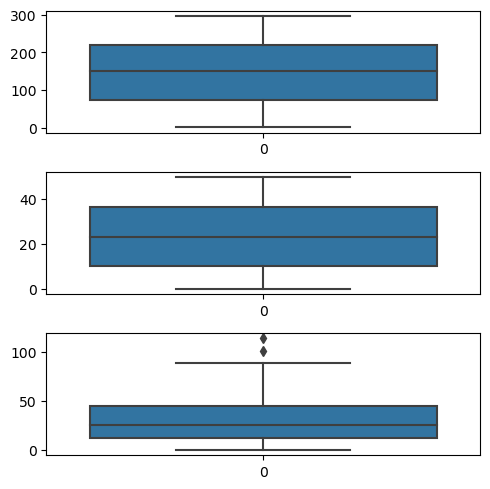

In [11]:
fig, axs  =plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

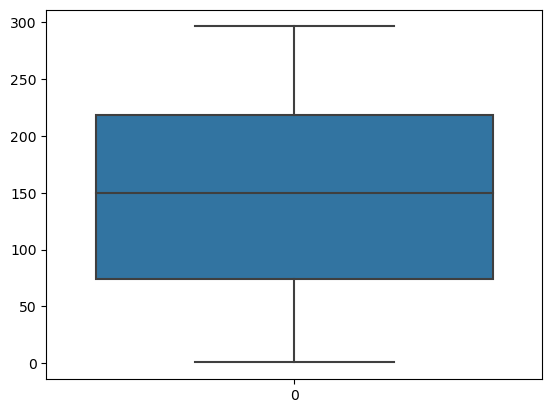

In [12]:
sns.boxplot(df['TV'])
plt.show()

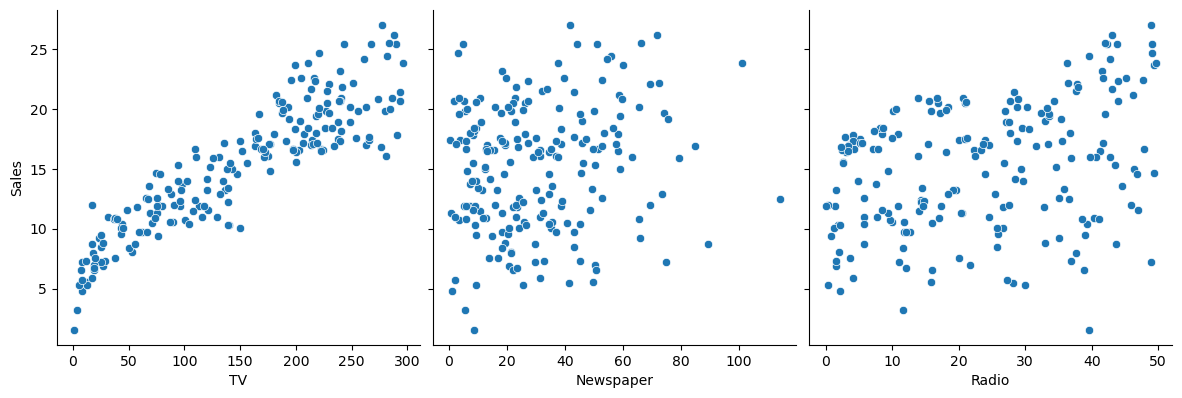

In [13]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

In [15]:
x=df['TV']
y=df['Sales']
print(x.shape,y.shape)

(200,) (200,)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=100)

In [17]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60,) (140,) (60,) (140,)


In [18]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const    6.054388
TV       0.062969
dtype: float64

In [19]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     436.6
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.13e-28
Time:                        21:56:36   Log-Likelihood:                -130.28
No. Observations:                  60   AIC:                             264.6
Df Residuals:                      58   BIC:                             268.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0544      0.487     12.421      0.000       5.079       7.030
TV             0.0630      0.003     20.894      0.000       0.057       0.069
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.353
Skew:                           0.091   Prob(JB):                        0.838
Kurtosis:                       2.671   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

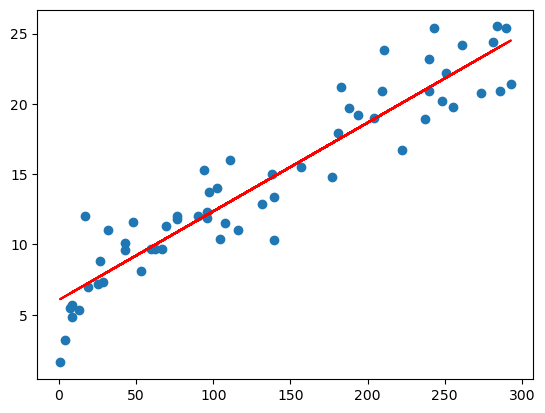

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.054+0.063*x_train,'r')
plt.show()

In [21]:
y_train_pred=lr.predict(x_train_sm)
res =(y_train-y_train_pred)

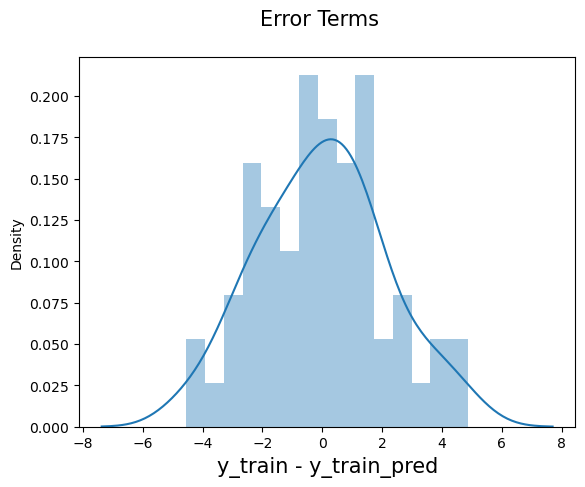

In [23]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 15)
plt.show()

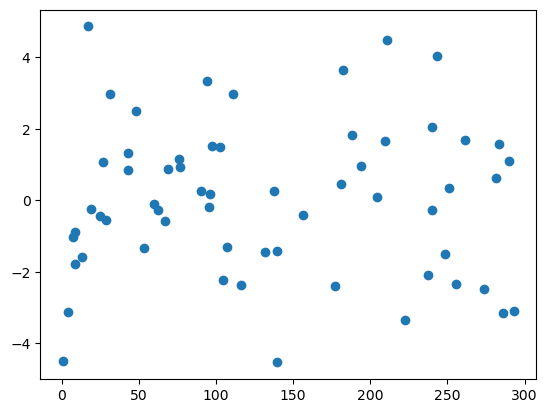

In [24]:
plt.scatter(x_train,res)
plt.show()

In [25]:
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)
y_pred.head()

126     6.545549
104    21.053685
99     14.567843
92     19.762814
111    21.274078
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.482263165059353

In [28]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.731040042697664

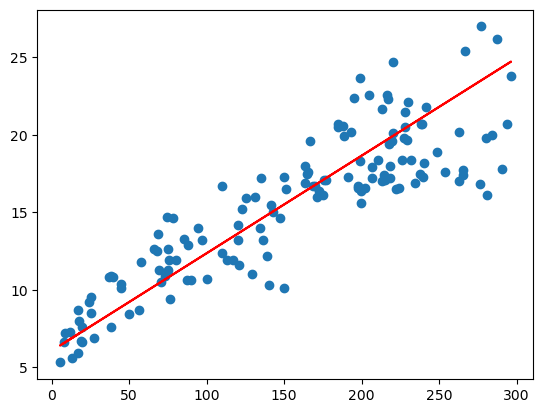

In [30]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.054+0.063*x_test,'r')

# Analysing data by histplot graph

<Axes: xlabel='TV', ylabel='Count'>

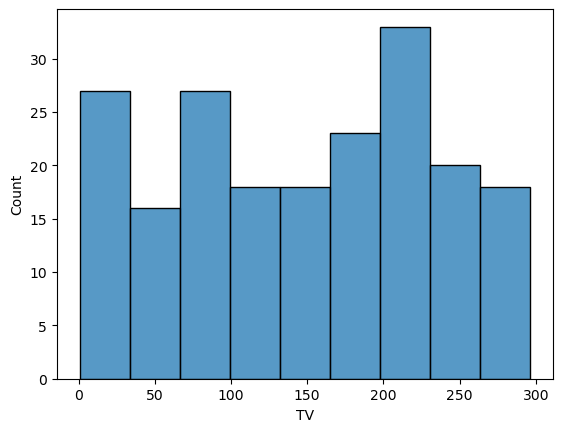

In [32]:
sns.histplot(df['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

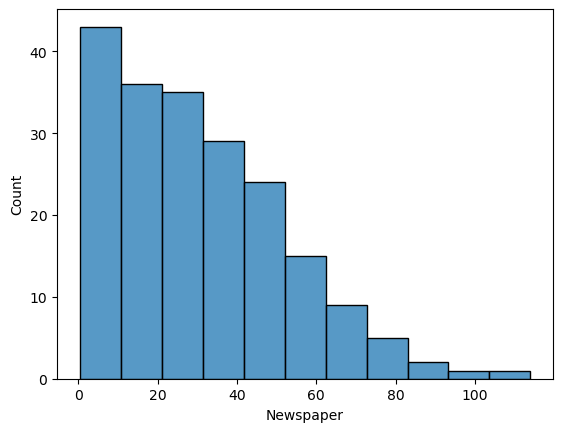

In [33]:
sns.histplot(df['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

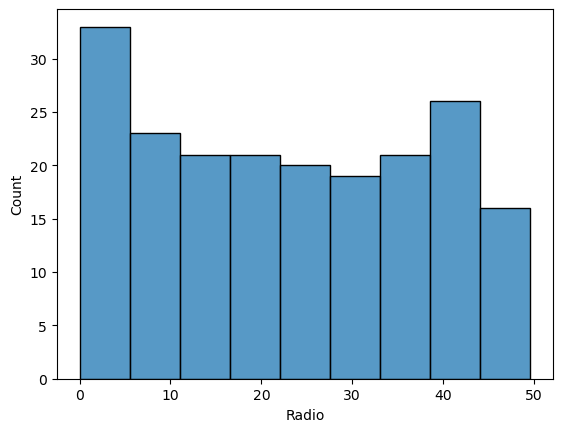

In [34]:
sns.histplot(df['Radio'])


<Axes: xlabel='Sales', ylabel='Count'>

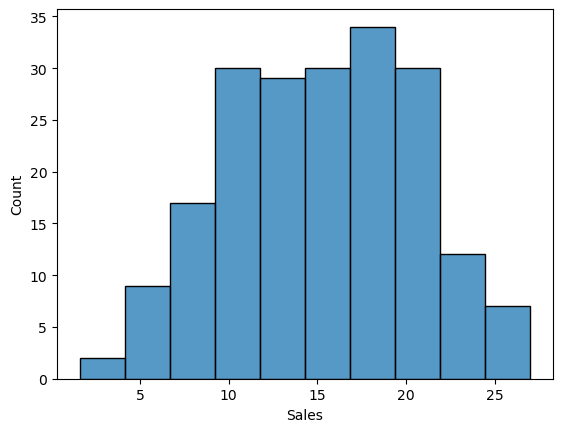

In [35]:
sns.histplot(df['Sales'])

# Analysing data by distplot graph

<Axes: xlabel='Newspaper', ylabel='Density'>

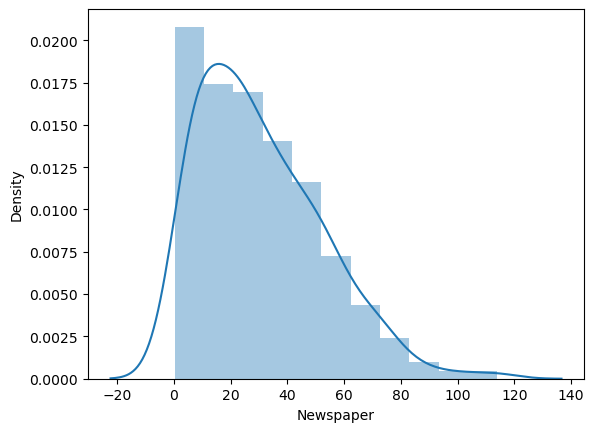

In [36]:
sns.distplot(df['Newspaper'])

<Axes: xlabel='TV', ylabel='Density'>

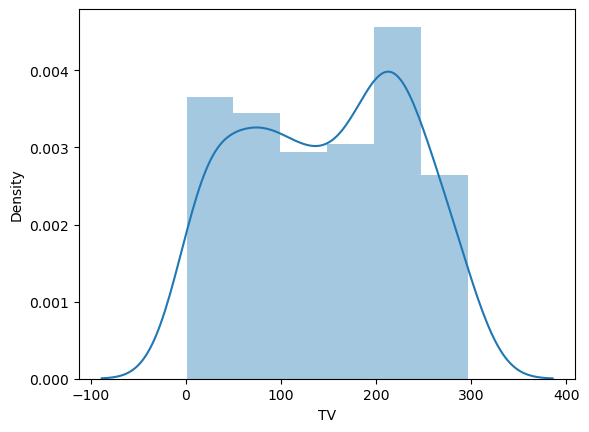

In [37]:
sns.distplot(df['TV'])

# Coorelation Matrix

In [38]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


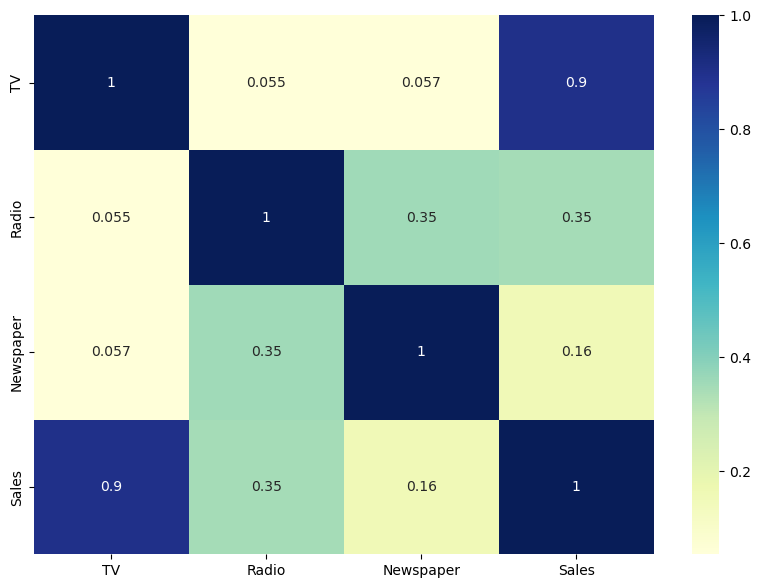

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

# Model Training

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3,random_state=0)


In [41]:
X_train

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3
...,...
67,139.3
192,17.2
117,76.4
47,239.9


In [43]:
y_train

,Sales
131,17.7
96,16.7
181,17.2
19,14.6
153,16.0
...,...
67,13.4
192,5.9
117,9.4
47,23.2


In [44]:
X_test

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2
182,56.2
5,8.7
146,240.1
12,23.8
152,197.6


In [45]:
y_test

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


In [46]:
##logistic regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
res= model.predict(X_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [48]:
model.coef_

array([[0.05473199]])

In [49]:
model.intercept_

array([7.14382225])

In [50]:
0.05473199* 69.2 + 7.14382225

10.931275958

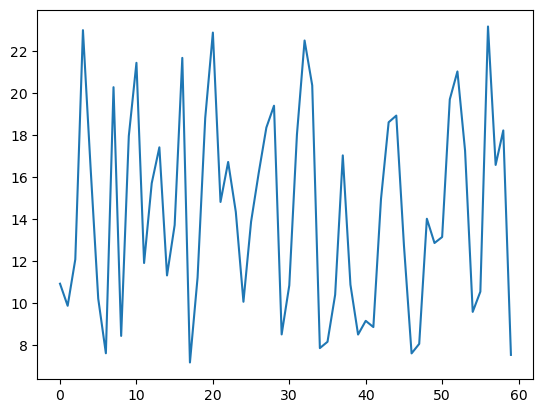

In [51]:
plt.plot(res)

In [52]:
#Dataset source:https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear

This Project is made by Abhishek Kumar during internship at CodSoft 